In [8]:
import numpy
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory

In [9]:
# TRAIN = image_dataset_from_directory("../dataset/train/", label_mode="categorical", color_mode='grayscale')
train_ds = image_dataset_from_directory(
    "../dataset/train/",
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode="categorical",
    color_mode="grayscale",
)
val_ds = image_dataset_from_directory(
    "../dataset/train/",
    validation_split=0.2,
    seed=42,
    subset="validation",
    label_mode="categorical",
    color_mode="grayscale",
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [10]:
TEST = image_dataset_from_directory(
    "../dataset/test/", label_mode="categorical", color_mode="grayscale"
)

Found 1279 files belonging to 4 classes.


In [11]:
class_names = train_ds.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


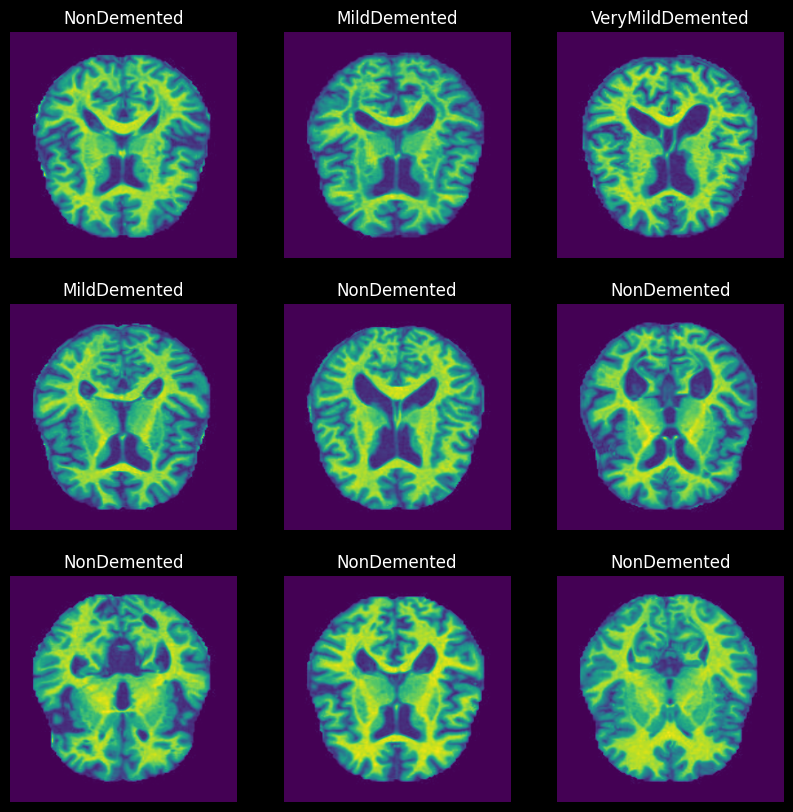

In [12]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[numpy.argmax(labels[i])])
        plt.axis("off")

In [13]:
input_shape = (256, 256, 1)
model = Sequential()
model.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4, activation="softmax"))
adam = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 128)     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 64)       

In [14]:
epochs = 1
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

2023-07-28 00:25:42.217587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - ETA: 0s - loss: 2639.8506 - accuracy: 0.4357

2023-07-28 00:28:59.569051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 205s 2s/step - loss: 2639.8506 - accuracy: 0.4357 - val_loss: 1.0270 - val_accuracy: 0.5195


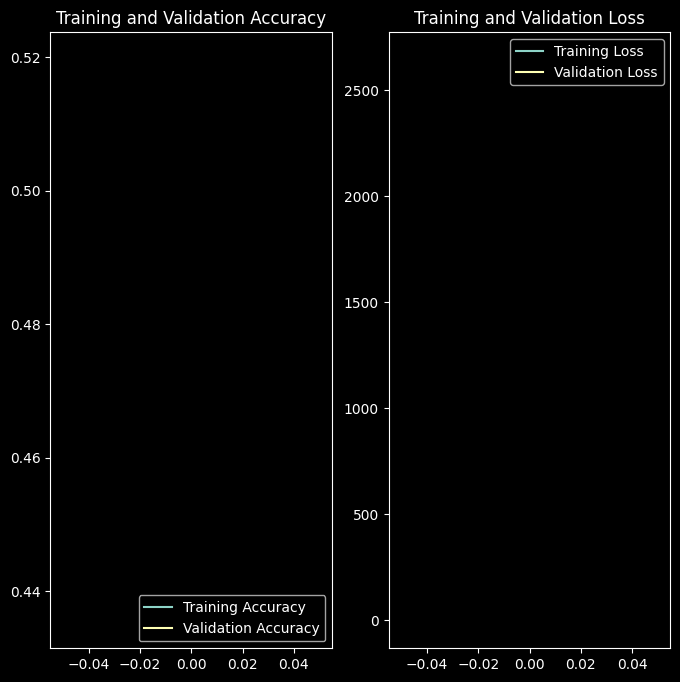

In [15]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()